# first of all we imp the all imp Libraries from the python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Now we copy the path of the dataset from the sourcecode

In [2]:
df=pd.read_csv("/content/Credit Card Customer segmentation.csv")

In [3]:
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


# Now we remove the unwanted outliers from the dataset using drop() function

In [4]:
df.drop(["Sl_No","Customer Key"],axis=1,inplace=True)

In [5]:
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [61]:
# Now lets assume feature x==df

In [6]:
x=df.iloc[:,0:5]

In [7]:
x

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


# Now we use StandardScaler process to range the data between 0 and 1

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [9]:
x=sc.fit_transform(x)

In [10]:
x

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

In [11]:
x=pd.DataFrame(x)

In [12]:
x

,0,1,2,3,4
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


# Now we import KMeans cluster using sciket learn

In [13]:
from sklearn.cluster import KMeans

In [14]:
sse=[] # sum squared error

In [15]:
for i in range(1,10):
    kms=KMeans(n_clusters=i)
    kms.fit(x)
    sse.append(kms.inertia_)

In [16]:
sse # Sum Squared error

[3300.000000000001,
 2040.9898164784945,
 933.0437490000536,
 780.7736895551766,
 704.4759188657507,
 642.473250786702,
 600.1542087771084,
 564.660509294057,
 543.7859173595186]

# Now we use Elbow Method to predict the value of y 

Text(0, 0.5, 'sse')

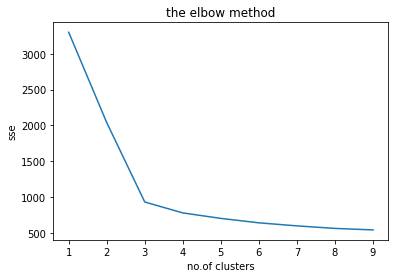

In [17]:
plt.plot(range(1,10),sse)
plt.title("the elbow method")
plt.xlabel("no.of clusters")
plt.ylabel("sse")

# Here KMeans of k=3

In [18]:
kms=KMeans(n_clusters=3)

In [19]:
y_kms=kms.fit_predict(x)

In [20]:
y_kms

array([2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

# Now we join the previous data and new data for feartues(x) and Label(y)

In [21]:
df_labels=pd.DataFrame(y_kms,columns=list(["labels"]))

In [22]:
df_labels["labels"]=df_labels["labels"].astype("category")

In [23]:
df_labeld=df.join(df_labels)

In [24]:
df_labeld

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,2
1,50000,3,0,10,9,0
2,50000,7,1,3,4,2
3,30000,5,1,1,4,2
4,100000,6,0,12,3,1
...,...,...,...,...,...,...
655,99000,10,1,10,0,1
656,84000,10,1,13,2,1
657,145000,8,1,9,1,1
658,172000,10,1,15,0,1


In [62]:
# Now we seperate out features(x) and Labels(y)

In [25]:
x=df_labeld.iloc[:,0:5]

In [26]:
x

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [27]:
y=df_labeld.iloc[:,-1]

In [28]:
y

0      2
1      0
2      2
3      2
4      1
      ..
655    1
656    1
657    1
658    1
659    1
Name: labels, Length: 660, dtype: category
Categories (3, int64): [0, 1, 2]

# Now we train and test the model with using sciket learn

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
len(x_train)

528

In [32]:
len(x_test)

132

# Now we use cross validation score for better prediction and accuracy

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
model_1=cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=4)

In [36]:
model_1

array([0.99242424, 0.98484848, 1.        , 0.96969697])

In [37]:
model_1.mean()

0.9867424242424243

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
model_2=cross_val_score(KNeighborsClassifier(),x_train,y_train,cv=4)

In [40]:
model_2

array([0.99242424, 0.99242424, 0.99242424, 1.        ])

In [41]:
model_2.mean()

0.9943181818181819

In [42]:
from sklearn.naive_bayes import GaussianNB 

In [43]:
model_3=cross_val_score(GaussianNB(),x_train,y_train,cv=4)

In [44]:
model_3.mean()

0.9981060606060606

# Now we choose Naive Bayes Classifier for the accuracy and prediction

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
model=GaussianNB()

In [47]:
model.fit(x_train,y_train)

GaussianNB()

In [48]:
model.score(x_test,y_test)

0.9924242424242424

In [59]:
y_pred=model.predict(x_test)

In [60]:
y_pred

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0])

In [63]:
# Now we are caluclating th confusion matrix

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [53]:
cf=confusion_matrix(y_test,y_pred)

In [56]:
cf

array([[46,  0,  1],
       [ 0,  6,  0],
       [ 0,  0, 79]])

# Now we are plotting the chart with use of matplotlib and seaborn

Text(0, 0.5, 'Avg_Credit_Limit')

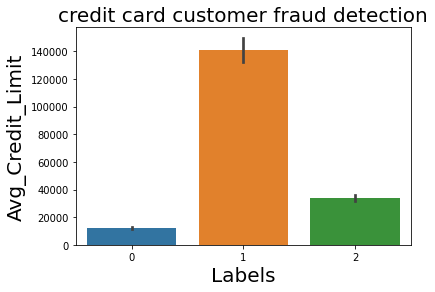

In [58]:
sns.barplot(x="labels",y="Avg_Credit_Limit",data=df_labeld)
plt.title("credit card customer fraud detection",size=20)
plt.xlabel("Labels",size=20)
plt.ylabel("Avg_Credit_Limit",size=20)